<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees

**TABLE OF CONTENTS**

* [1.Random Forest](#Random-Forest)
* [2.Model](#Model)  
* [3.References](#References)

# Random Forest

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

Dataset loading and path creation

In [7]:
X_train = pd.read_csv("../data/x_train.csv")
Y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/x_train.csv")
Y_test = pd.read_csv("../data/y_train.csv")

Since data are not treated we load the pipeline


In [8]:
pl = '../pipelines/tratamiento1.sav'
prepocesador = pickle.load(open(pl, 'rb'))

# Model

In [9]:
modelo_random = Pipeline(steps=[
    ('preprocesador',prepocesador),
    
    ('clasificador', RandomForestClassifier(n_estimators = 500,n_jobs = -1,random_state=2020))])
modelo_random.fit(X_train, Y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
     

In [10]:
modelo_random.score(X_train, Y_train)

1.0

In [11]:
modelo_random.score(X_test, Y_test)

1.0

And we predict


In [12]:
Y_pred = modelo_random.predict(X_test)

Additionally, we predict the probability of being default or fully paid

In [13]:
Y_prob = modelo_random.predict_proba(X_test)

In [14]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81750
           1       1.00      1.00      1.00    241783

    accuracy                           1.00    323533
   macro avg       1.00      1.00      1.00    323533
weighted avg       1.00      1.00      1.00    323533



## ROCs Curve

ROC curves are usually in the form of a cumulative gain graph. The curve starts at the coordinate (0.0) and ends at the coordinate (1.1) as it moves from left to right. A graph that rises sharply to the coordinate (0.1) and then stabilizes is an indicator of a good classifier. A model that randomly classifies instances as hits or misses will follow the diagonal from the extreme left bottom to the extreme right top (shown in the graph if Include baseline is selected). If no confidence field is provided for a model, that model will be plotted as a single point. The classifier with the optimal classification threshold is closest to the coordinate (0.1) or top left corner of the graph. This location represents a large number of instances that are correctly classified as hits, and a low number of instances that are incorrectly classified as hits. The points above the diagonal line represent good classification results. The points below the diagonal line represent bad classification results, worse than if the instances had been classified randomly.

In [15]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, y_pred_prob) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

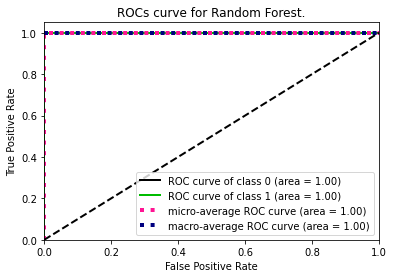

In [16]:
roc(modelo_random, 'Random Forest')

## Confusion Matrix

In the field of artificial intelligence and especially in the problem of statistical classification, a confounding matrix is a tool that allows the visualisation of the performance of an algorithm used in supervised learning. Each column of the matrix represents the number of predictions of each class, while each row represents the instances in the real class. One of the benefits of confounding matrices is that they make it easier to see if the system is confusing two classes.

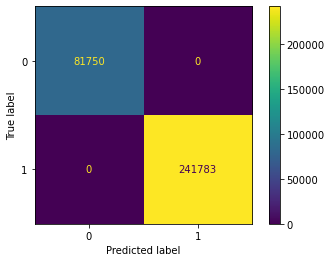

In [17]:
plot_confusion_matrix(modelo_random, X=X_test, y_true=Y_test);

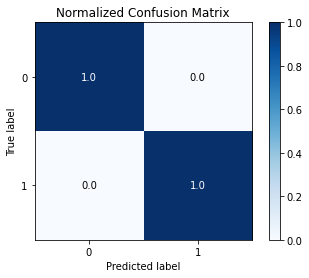

In [18]:

modelprediction_labels = modelo_random.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True);

## Cumulative gains

Cumulative profit charts always start at 0% and end at 100% from left to right. To get a good model, the profit graph should increase considerably towards 100% and then decrease. Models that do not provide information will show a diagonal from the lower left to upper right corner (shown on the graph if Include Baseline is selected).

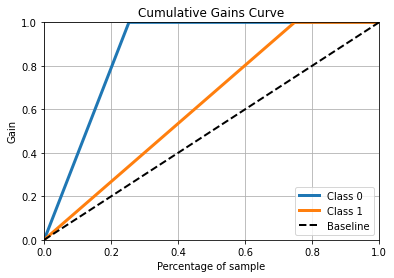

In [19]:
skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

With 20% of the sample we get 80% of the results, and with 25% of the sample we get 100%. This may be because we have included some variable that should be a posteriori or variables are not specified.

In [20]:
model1 = '../model/random_forest.sav'
pickle.dump(modelo_random, open(model1, 'wb'))

# References

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html